In [13]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

customers = pd.read_csv("/content/drive/MyDrive/Customers.csv")
products = pd.read_csv("/content/drive/MyDrive/Products.csv")
transactions = pd.read_csv("/content/drive/MyDrive/Transactions.csv")


print("Customers Dataset Head:")
print(customers.head())

print("\nProducts Dataset Head:")
print(products.head())

print("\nTransactions Dataset Head:")
print(transactions.head())


print("\nDataset Shapes:")
print(f"Customers: {customers.shape}")
print(f"Products: {products.shape}")
print(f"Transactions: {transactions.shape}")

Customers Dataset Head:
  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15

Products Dataset Head:
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31

Transactions Dataset Head:
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2  

In [14]:
# Checking for missing values
print(customers.isnull().sum())
print(products.isnull().sum())
print(transactions.isnull().sum())

# Checking for duplicates
print("\nDuplicate Records:")
print(f"Customers: {customers.duplicated().sum()}")
print(f"Products: {products.duplicated().sum()}")
print(f"Transactions: {transactions.duplicated().sum()}")

# Converting date columns to datetime format
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64

Duplicate Records:
Customers: 0
Products: 0
Transactions: 0


Generating Summary Statistics

In this segment, I have done descriptive statistics for numerical columns to understand central tendency, dispersion, and distribution of transaction data. This step is helpful in understanding the data's scale and key metrics.

In [15]:
#Basic Statistics

print("\nSummary Statistics for Transactions:")
print(transactions.describe())

print("\nSummary Statistics for Products:")
print(products.describe())

# Count of unique values in key columns
print("\nUnique Customers:", customers['CustomerID'].nunique())
print("Unique Products:", products['ProductID'].nunique())
print("Unique Transactions:", transactions['TransactionID'].nunique())


Summary Statistics for Transactions:
                     TransactionDate     Quantity   TotalValue       Price
count                           1000  1000.000000  1000.000000  1000.00000
mean   2024-06-23 15:33:02.768999936     2.537000   689.995560   272.55407
min              2023-12-30 15:29:12     1.000000    16.080000    16.08000
25%       2024-03-25 22:05:34.500000     2.000000   295.295000   147.95000
50%       2024-06-26 17:21:52.500000     3.000000   588.880000   299.93000
75%              2024-09-19 14:19:57     4.000000  1011.660000   404.40000
max              2024-12-28 11:00:00     4.000000  1991.040000   497.76000
std                              NaN     1.117981   493.144478   140.73639

Summary Statistics for Products:
            Price
count  100.000000
mean   267.551700
std    143.219383
min     16.080000
25%    147.767500
50%    292.875000
75%    397.090000
max    497.760000

Unique Customers: 200
Unique Products: 100
Unique Transactions: 1000


Merging Datasets

In this segment, I have merged the Transactions.csv dataset with Products.csv to add product details, and then merged it with Customers.csv to include customer information. This created a comprehensive dataset for cross-referencing customers, products, and transactions.

In [16]:

transactions_merged = pd.merge(transactions, products, on='ProductID', how='left')

full_data = pd.merge(transactions_merged, customers, on='CustomerID', how='left')

print("\nMerged Dataset Head:")
print(full_data.head())

print("\nMissing Values in Merged Dataset:")
print(full_data.isnull().sum())


Merged Dataset Head:
  TransactionID CustomerID ProductID     TransactionDate  Quantity  \
0        T00001      C0199      P067 2024-08-25 12:38:23         1   
1        T00112      C0146      P067 2024-05-27 22:23:54         1   
2        T00166      C0127      P067 2024-04-25 07:38:55         1   
3        T00272      C0087      P067 2024-03-26 22:55:37         2   
4        T00363      C0070      P067 2024-03-21 15:10:10         3   

   TotalValue  Price_x                      ProductName     Category  Price_y  \
0      300.68   300.68  ComfortLiving Bluetooth Speaker  Electronics   300.68   
1      300.68   300.68  ComfortLiving Bluetooth Speaker  Electronics   300.68   
2      300.68   300.68  ComfortLiving Bluetooth Speaker  Electronics   300.68   
3      601.36   300.68  ComfortLiving Bluetooth Speaker  Electronics   300.68   
4      902.04   300.68  ComfortLiving Bluetooth Speaker  Electronics   300.68   

      CustomerName         Region SignupDate  
0   Andrea Jenkins     

Key Insights

1.Top-Selling Products Analysis

In this segment, I have identified the top 10 best-selling products by aggregating the quantity sold. A bar plot was created to visualize the results, highlighting high-demand products and supporting inventory and marketing decisions.


Top 10 Best-Selling Products:
ProductName
ActiveWear Smartwatch    100
SoundWave Headphones      97
HomeSense Desk Lamp       81
ActiveWear Rug            79
SoundWave Cookbook        78
ActiveWear Jacket         76
BookWorld Biography       71
TechPro T-Shirt           66
SoundWave Desk Lamp       64
TechPro Textbook          62
Name: Quantity, dtype: int64


<ipython-input-17-0b9c7661ee0e>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.values, y=top_products.index, palette='viridis')


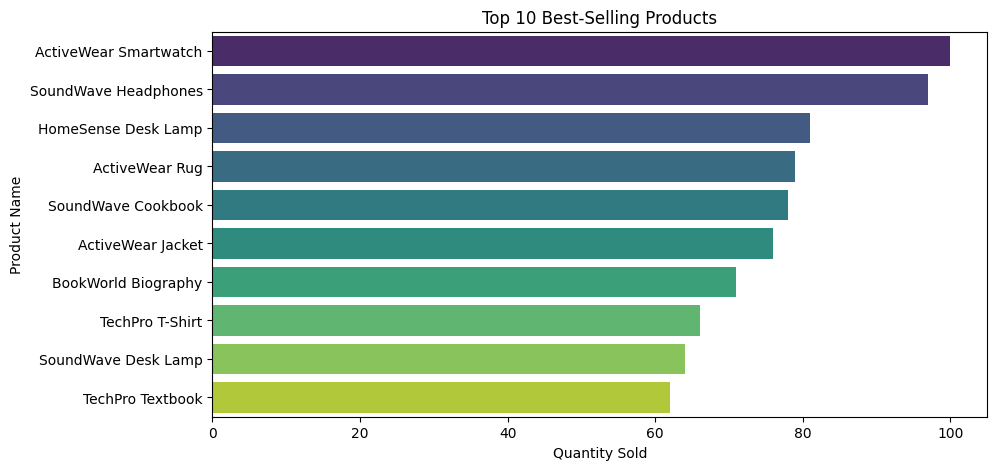

In [17]:

top_products = full_data.groupby('ProductName')['Quantity'].sum().sort_values(ascending=False).head(10)
print("\nTop 10 Best-Selling Products:")
print(top_products)


plt.figure(figsize=(10, 5))
sns.barplot(x=top_products.values, y=top_products.index, palette='viridis')
plt.title("Top 10 Best-Selling Products")
plt.xlabel("Quantity Sold")
plt.ylabel("Product Name")
plt.show()

2.Revenue by Region Analysis

In this segment, I have analyzed revenue distribution by region by summing up the TotalValue for each region. A bar plot was created to visualize the revenue contribution, helping to identify strong and weak-performing markets


Revenue by Region:
Region
South America    219352.56
Europe           166254.63
North America    152313.40
Asia             152074.97
Name: TotalValue, dtype: float64


<ipython-input-18-1adb1a482ab2>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=revenue_region.values, y=revenue_region.index, palette='coolwarm')


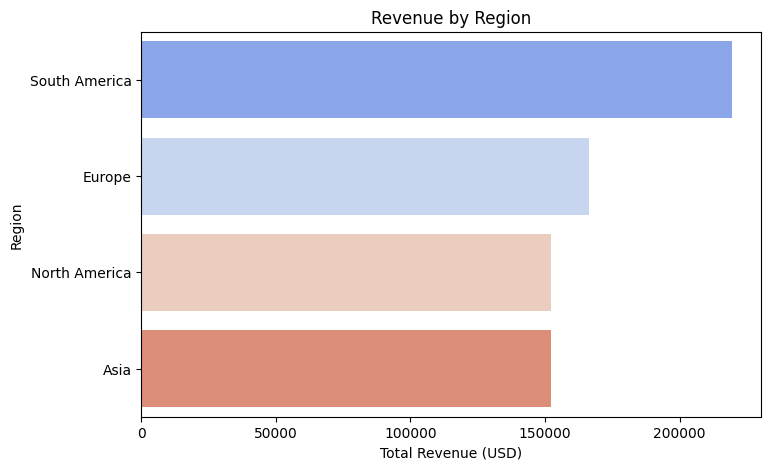

In [18]:

revenue_region = full_data.groupby('Region')['TotalValue'].sum().sort_values(ascending=False)
print("\nRevenue by Region:")
print(revenue_region)

# Plotting
plt.figure(figsize=(8, 5))
sns.barplot(x=revenue_region.values, y=revenue_region.index, palette='coolwarm')
plt.title("Revenue by Region")
plt.xlabel("Total Revenue (USD)")
plt.ylabel("Region")
plt.show()

3.Customer Signup Trend Analysis

In this segment, I have analyzed yearly customer signup trends by extracting the year from the SignupDate column. A line plot was created to visualize trends in customer acquisition, providing insights into growth patterns and seasonal effects.


Customer Signup Trend by Year:
SignupDate
2022    64
2023    57
2024    79
Name: count, dtype: int64


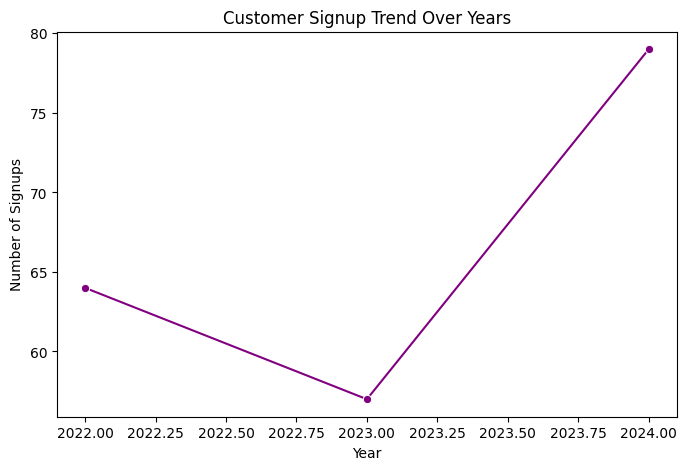

In [19]:

signup_trend = customers['SignupDate'].dt.year.value_counts().sort_index()
print("\nCustomer Signup Trend by Year:")
print(signup_trend)

# Plotting
plt.figure(figsize=(8, 5))
sns.lineplot(x=signup_trend.index, y=signup_trend.values, marker='o', color='purple')
plt.title("Customer Signup Trend Over Years")
plt.xlabel("Year")
plt.ylabel("Number of Signups")
plt.show()

4.Most Active Customers Analysis

In this segment, I have identified the most active customers by counting transactions per customer. The top 10 customers were visualized using a bar plot, helping to highlight loyal customers for targeted retention strategies.


Top 10 Most Active Customers:
CustomerID
C0109    11
C0156    11
C0141    10
C0175    10
C0065    10
C0008    10
C0147     9
C0093     9
C0075     9
C0084     9
Name: count, dtype: int64


<ipython-input-20-c396038070e2>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=active_customers.values, y=active_customers.index, palette='mako')


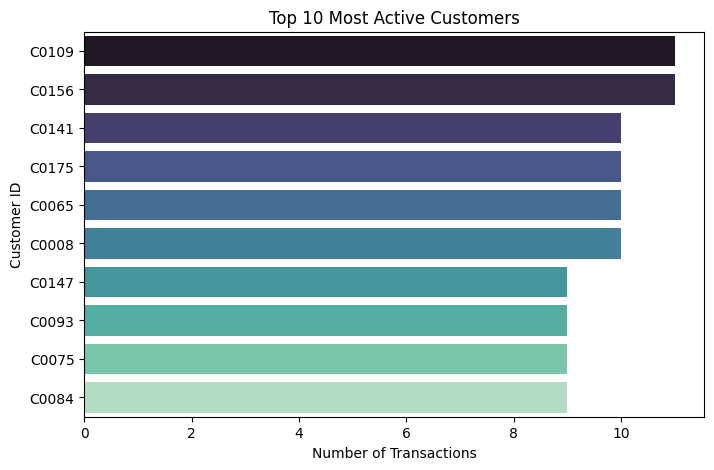

In [20]:

active_customers = full_data['CustomerID'].value_counts().head(10)
print("\nTop 10 Most Active Customers:")
print(active_customers)

# Plotting
plt.figure(figsize=(8, 5))
sns.barplot(x=active_customers.values, y=active_customers.index, palette='mako')
plt.title("Top 10 Most Active Customers")
plt.xlabel("Number of Transactions")
plt.ylabel("Customer ID")
plt.show()

5.Category-Wise Revenue Analysis

In this segment, I have calculated revenue contributions from each product category by summing up the TotalValue column. A bar plot was created to show which categories contribute the most to revenue, aiding in product strategy and promotions.


Revenue by Product Category:
Category
Books          192147.47
Electronics    180783.50
Clothing       166170.66
Home Decor     150893.93
Name: TotalValue, dtype: float64


<ipython-input-21-bea047661fa2>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_revenue.values, y=category_revenue.index, palette='cubehelix')


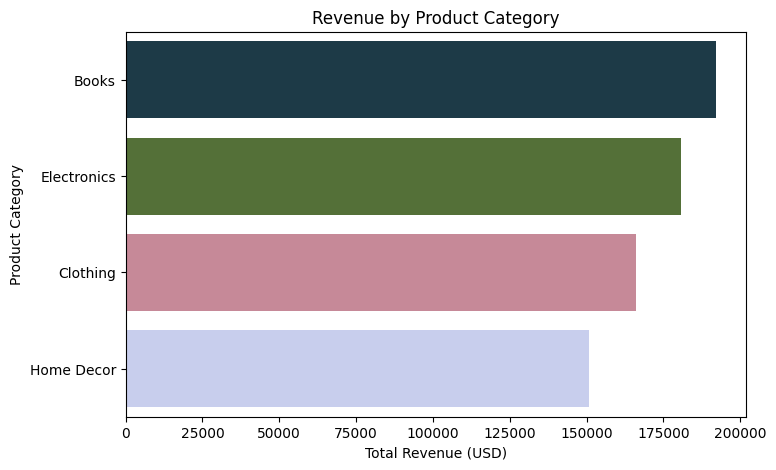

In [21]:


category_revenue = full_data.groupby('Category')['TotalValue'].sum().sort_values(ascending=False)
print("\nRevenue by Product Category:")
print(category_revenue)

# Plotting
plt.figure(figsize=(8, 5))
sns.barplot(x=category_revenue.values, y=category_revenue.index, palette='cubehelix')
plt.title("Revenue by Product Category")
plt.xlabel("Total Revenue (USD)")
plt.ylabel("Product Category")
plt.show()